# CLUSTERING

> Clustering techniques are used to group data/observations in a few segments so that data within any segment are similar while data across segments are different. Defining what we mean when we say “similar” or “different” observations is a key part of cluster analysis which often requires a lot of contextual knowledge and creativity beyond what statistical tools can provide.

Cluster analysis is used in a variety of applications. For example it can be used to identify consumer segments, or competitive sets of products, or groups of assets whose prices co-move, or for geo-demographic segmentation, etc. In general it is often necessary to split our data into segments and perform any subsequent analysis within each segment in order to develop (potentially more refined) segment-specific insights. This may be the case even if there are no intuitively “natural” segments in our data.

In [1]:
%matplotlib inline

In [2]:
# beer dataset
import pandas as pd

beer = pd.read_csv('beer.txt', sep=' ')

In [3]:
beer

# comparable unnits of anlaysis diffest mistake in reaserch deisgn
# 1 crappy data
# 2 not having comaprable units of analysis

# what are our comparable units of analyiss
# can i compare caloriles to sodium to alcohaul to cost?
# can we compare within the column, but we cant compare within the row

# STOP what you are doing to MEASURE TWICE. 
# how do we normalize to get comparable units of analysis? WE SCALE!

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [4]:
# Define X
X = beer.drop('name', axis=1)
# remove the lables

In [5]:
X
# there is no y because there is no target in unsupervised
# There is no target variable
# output: patterns and data that we do not know. 
# get the outoupt and look at what features are different between clusters
# WHY? Example: Amazon can segment customers. divide up customers. and we dont know what divides customers from each other
# Marketing: understanding customer segmentation. what prodcuts to people purchase together.


,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


## K-means CLUSTERING

Having pre-processed the data we can now perform clustering on the dataset. In this section, we will be using the python library [scikit-learn](http://scikit-learn.org/stable/index.html) for our machine learning algorithms. scikit-learn provides an extensive library of machine learning algorithms that can be used for analysis. Here is a [nice flow chart](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) that shows various algorithms implemented
and when to use any of them. In this part we will look at K-Means clustering

> **Note on terminology**: "samples" and "features" are two words you will come across frequently when you look at machine learning papers or documentation. "samples" refer to data points that are used as inputs to the machine learning algorithm. For example in our dataset each row of beer is a "sample". "features" refers to some representation we have for every sample. For example the sodium, alochol, cost and calories are "features". 

#### K-Means algorithm

Clustering is the process of automatically grouping data points that are similar to each other. In the [K-Means algorithm](http://en.wikipedia.org/wiki/K-means_clustering) we start with `K` initially chosen cluster centers (or centroids). We then compute the distance of every point from the centroids and assign each point to the centroid. Next we update the centroids by averaging all the points in the cluster. Finally, we repeat the algorithm until the cluster centers are stable.

### RUNNING K-Means

#### K-Means interface
Take a minute to look at the scikit-learn interface for calling [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). The constructor of the KMeans class returns a `estimator` on which you can call [fit](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) to perform clustering.

#### K-Means parameters
From the above description we can see that there are a few parameters which control the K-Means algorithm. We will look at one parameter specifically, the number of clusters used in the algorithm. The number of clusters needs to be chosen based on domain knowledge of the data. As we do not know how many clusters exist we will try different values and compare the results.

#### Timing your code
We will also measure the performance of clustering algorithms in this section. You can time the code in a cell using the **%%time** [IPython magic](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) as the first line in the cell. 

>**Note**: By default, the scikit-learn KMeans implementation runs the algorithm 10 times with different center initializations. You can run it just once by passing the `n_init` argument as 1.

In [6]:
%%time
# it takes some domain knowledge to know how many clusters to use. Default is 8.
# ask a beer expert how or what would you group beers by? 
# this is where the elbow method comes into play if you need to get started. 

# K-means with 2 clusters
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2, n_init=1, random_state=1)
kmeans_2.fit(X) # training the model < -- learning
# no y becuase there is no prediction variable

CPU times: user 305 ms, sys: 94.7 ms, total: 400 ms
Wall time: 659 ms


KMeans(n_clusters=2, n_init=1, random_state=1)

In [7]:
%%time

# K-means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, n_init=1, random_state=1)
kmeans_3.fit(X)

CPU times: user 62.6 ms, sys: 25.2 ms, total: 87.7 ms
Wall time: 13.1 ms


KMeans(n_clusters=3, n_init=1, random_state=1)

In [8]:
%%time

# K-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=1, random_state=1)
kmeans_4.fit(X)

CPU times: user 28.6 ms, sys: 48.9 ms, total: 77.5 ms
Wall time: 12.4 ms


KMeans(n_clusters=4, n_init=1, random_state=1)

In [9]:
# Review the cluster labels (based on calories only, due to scale)
kmeans_3.labels_

array([1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=int32)

In [10]:
beer['cluster'] = kmeans_3.labels_
beer.sort_values('cluster')
# look at what beers where placed in which clusters
# ignore the names. ignore the lables becuase that would not be there
# the model is looking at all the correlations of the features and putting them into clusters
# in real world, I would not have the name lables.

,name,calories,sodium,alcohol,cost,cluster
9,Budweiser_Light,113,8,3.7,0.40,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
11,Coors_Light,102,15,4.1,0.46,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
8,Miller_Lite,99,10,4.3,0.43,0
19,Schlitz_Light,97,7,4.2,0.47,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
4,Heineken,152,11,5.0,0.77,1
10,Coors,140,18,4.6,0.44,1
2,Lowenbrau,157,15,0.9,0.48,1


In [11]:
# Review the cluster centers
kmeans_3.cluster_centers_

array([[ 91.83333333,  10.16666667,   3.58333333,   0.43333333],
       [146.25      ,  17.25      ,   4.38333333,   0.51333333],
       [172.5       ,  15.5       ,   5.35      ,   0.565     ]])

In [12]:
df_beer = beer.drop('name', axis=1)
centers = df_beer.groupby('cluster').mean()

In [13]:
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,91.833333,10.166667,3.583333,0.433333
1,146.250000,17.250000,4.383333,0.513333
2,172.500000,15.500000,5.350000,0.565000


In [14]:
import numpy as np

# Create colors array for plotting
colors = np.array(['red', 'green', 'blue'])

Text(0, 0.5, 'alcohol')

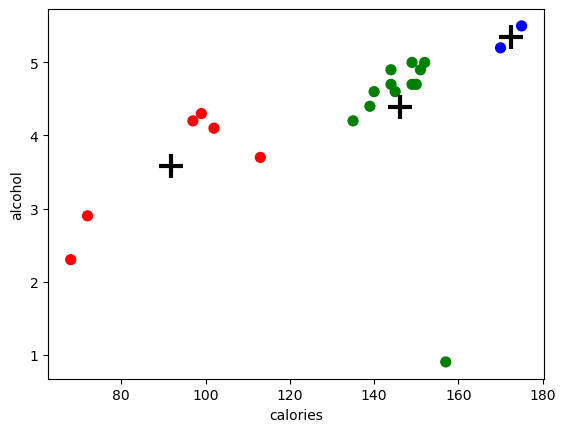

In [15]:
import matplotlib.pyplot as plt

# Plot clusters with their centers
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('calories')
plt.ylabel('alcohol')
# the + is a centroid and the dots are the clusters

### Create a matrix of scatter plots for each pair of numerical columns

Since you have columns like 'calories', 'sodium', 'alcohol', 'cost', and 'cluster', the scatter matrix shows scatter plots for each combination of these columns

1. Diagonal Plots (Histograms):
* Along the diagonal of the matrix, you see histograms for each numerical variable, which represent the distribution of each variable individually.

2. Off-Diagonal Plots (Scatter Plots):
* In the off-diagonal cells, you have scatter plots for pairs of variables. Each point on the scatter plot represents a data point in our DataFrame.
* For example, if you look at the scatter plot in the cell where 'calories' intersects 'sodium', each point on the plot represents a data point's calories and sodium values.
* The color of each point is determined by the 'cluster' column. This allows you to visually inspect if there's any pattern or grouping in the clusters based on the scatter plots.

3. Coloring by 'cluster':
* You are using the 'colors[beer.cluster]' argument to color the points based on the 'cluster' column. This is helpful if you want to see if the clusters assigned by your k-means model exhibit any noticeable patterns in the scatter plots.

4. Points in Different Clusters:
* If the scatter plots show distinct groups of points based on color, it suggests that the clusters exhibit differences in the values of the plotted variables.
* For instance, if you see points in one color grouping together in certain regions of the scatter plots, it indicates that those data points share similar characteristics in terms of the plotted variables.

Overall, the scatter matrix provides a visual tool for assessing relationships, distributions, and patterns in the data. It's particularly useful when you have multiple numerical variables and want to explore their interactions and correlations.

array([[<Axes: xlabel='calories', ylabel='calories'>,
        <Axes: xlabel='sodium', ylabel='calories'>,
        <Axes: xlabel='alcohol', ylabel='calories'>,
        <Axes: xlabel='cost', ylabel='calories'>],
       [<Axes: xlabel='calories', ylabel='sodium'>,
        <Axes: xlabel='sodium', ylabel='sodium'>,
        <Axes: xlabel='alcohol', ylabel='sodium'>,
        <Axes: xlabel='cost', ylabel='sodium'>],
       [<Axes: xlabel='calories', ylabel='alcohol'>,
        <Axes: xlabel='sodium', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='cost', ylabel='alcohol'>],
       [<Axes: xlabel='calories', ylabel='cost'>,
        <Axes: xlabel='sodium', ylabel='cost'>,
        <Axes: xlabel='alcohol', ylabel='cost'>,
        <Axes: xlabel='cost', ylabel='cost'>]], dtype=object)

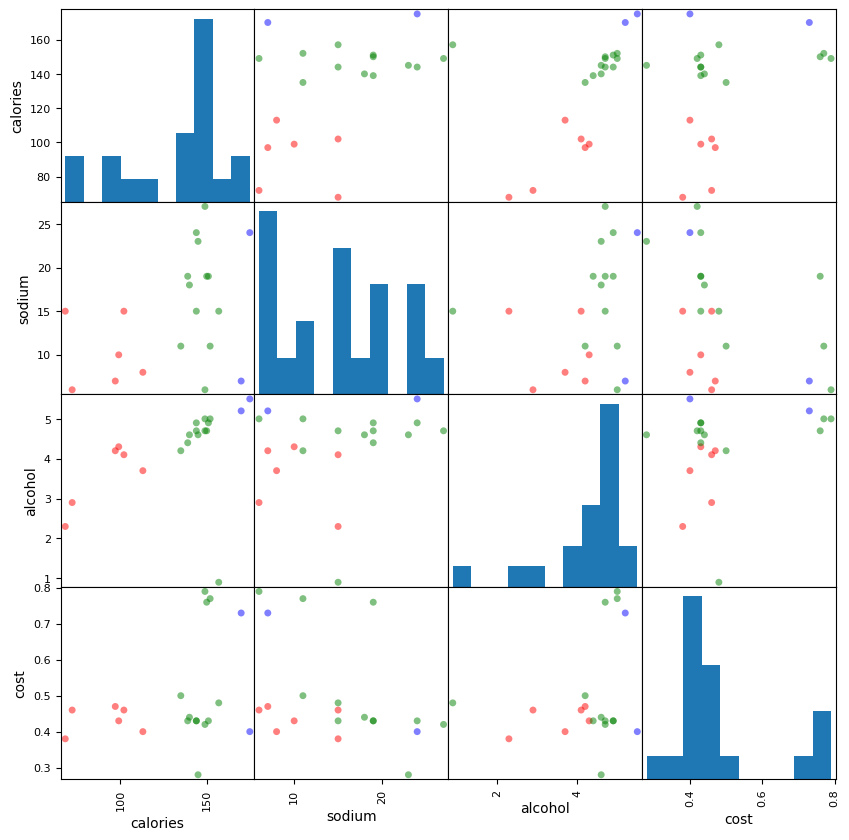

In [16]:
from pandas.plotting import scatter_matrix

# Scatter plot matrix
scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

# a different way to visuzlize it

In [17]:
# Do not forget to scale the data

In [18]:
from sklearn.preprocessing import StandardScaler

# Center and scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# we creadted comparable units of analysis. 
# some of the numeric values are very high 
# comaprable units of analysis are important. 


In [20]:
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

### USE SCALED DATA TO FIT 2, 3, 4 clusters

In [21]:
# K-means with 2 clusters on scaled data
kmeans_2s = KMeans(n_clusters=2, n_init=1, random_state=1)
kmeans_2s.fit(X_scaled)  # compute k-means clustering

KMeans(n_clusters=2, n_init=1, random_state=1)

In [22]:
# K-means with 3 clusters on scaled data
kmeans_3s = KMeans(n_clusters=3, n_init=1, random_state=1)
kmeans_3s.fit(X_scaled)

KMeans(n_clusters=3, n_init=1, random_state=1)

In [23]:
# K-means with 2 clusters on scaled data
kmeans_4s = KMeans(n_clusters=4, n_init=1, random_state=1)
kmeans_4s.fit(X_scaled)

KMeans(n_clusters=4, n_init=1, random_state=1)

In [24]:
beer['cluster'] = kmeans_3s.labels_
beer.sort_values('cluster')
df_beer = beer.drop('name', axis=1)
df_beer.groupby('cluster').mean()

# look at the difference between this data and the previous

,calories,sodium,alcohol,cost
cluster,,,,
0,91.833333,10.166667,3.583333,0.433333
1,149.461538,17.153846,4.800000,0.523846
2,157.000000,15.000000,0.900000,0.480000


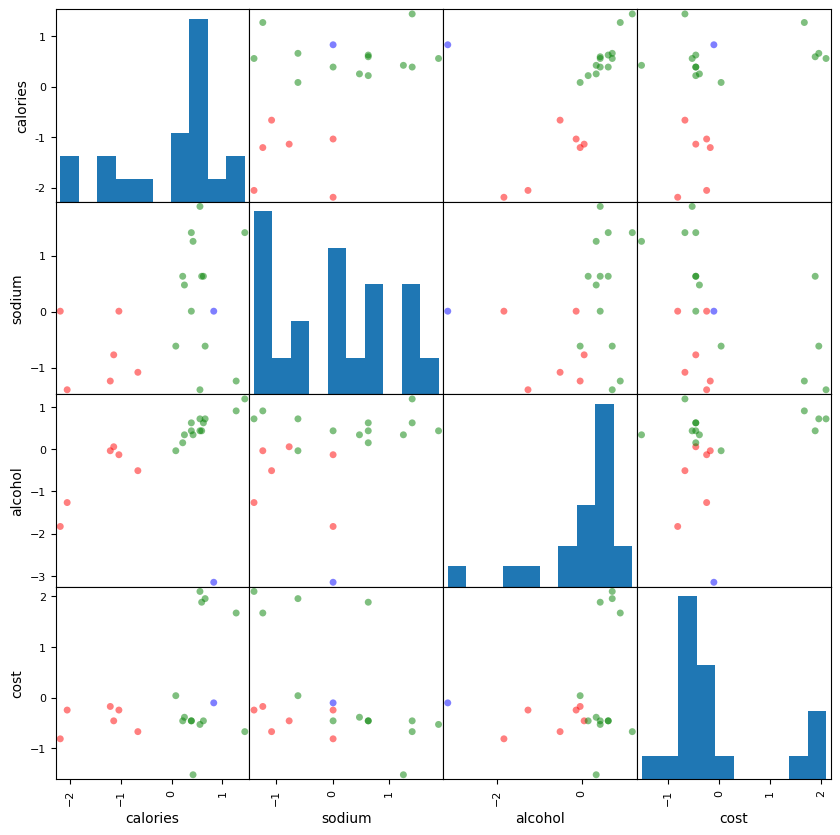

In [25]:
# Scatter plot matrix with scaled data
beer_scaled = pd.DataFrame(X_scaled, columns=beer.columns[1:-1])
scatter_matrix(beer_scaled, c=colors[beer.cluster], figsize=(10,10), s=100);

In [26]:
beer_scaled

,calories,sodium,alcohol,cost
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.828339,0.007795,-3.149822,-0.102698
3,1.268765,-1.239354,0.905338,1.667960
4,0.658944,-0.615780,0.716726,1.951265
5,0.421792,1.254943,0.339502,-1.519224
6,1.438159,1.410837,1.188256,-0.669309
7,0.557308,1.878518,0.433808,-0.527656
8,-1.136637,-0.771673,0.056584,-0.456830
9,-0.662332,-1.083460,-0.509253,-0.669309


In [27]:
beer_scaled['cluster'] = kmeans_3s.labels_
beer_scaled.sort_values('cluster')
beer_scaled.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,-1.379436,-0.745691,-0.619276,-0.433221
1,0.572944,0.343566,0.528114,0.207848
2,0.828339,0.007795,-3.149822,-0.102698


## EVALUATING K-means

In addition to the performance comparisons we also wish to compare how good our clusters are. To do this we are first going to look at internal evaluation metrics. For internal evaluation we only use the input data and the clusters created and try to measure the quality of clusters created. We are going to use two metrics for this:

### INERTIA

Inertia is a metric that is used to estimate how close the data points in a cluster are. This is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster center. The intution behind inertia is that clusters with lower inertia are better as it means closely related points form a cluster. Inertia is calculated by scikit-learn by default.

In [28]:
print("Inertia for KMeans with 2 clusters = %lf " % kmeans_2s.inertia_)
print("Inertia for KMeans with 3 clusters =  %lf " % kmeans_3s.inertia_)
print("Inertia for KMeans with 4 clusters = %lf " % kmeans_4s.inertia_)

Inertia for KMeans with 2 clusters = 54.027873 
Inertia for KMeans with 3 clusters =  41.212081 
Inertia for KMeans with 4 clusters = 18.566435 


In [29]:
# $ clusters is lowest inertia
# cant lookk at interia alone, need to look at inertia and sihlotte together

**Q**. Does KMeans run with 4 clusters have lower or greater inertia than the ones with 3 clusters ? Which algorithm is better and why ?

>Lower inertia. It is better since more closely related points are forming a cluster

### SILHOUETTE SCORE

The silhouette score measures how close various clusters created are. A higher silhouette score is better as it means that we dont have too many overlapping clusters. The silhouette score can be computed using [sklearn.metrics.silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) from scikit learn.

This measure has a range of [-1, 1].

Silhoette Score (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The silhouette analysis is used to choose an optimal value for n_clusters. 


** Silhouette Score (SC) is calculated for each observation as follows:

- a = mean distance to all other points in its cluster
- b = mean distance to all other points in the next nearest cluster
- SC = (b-a)/max(a, b)

- SC ranges from -1 (worst) to 1 (best).

- A global SC is calculated by taking the mean of the SC for all observations.

In [30]:
beer.shape

(20, 6)

In [31]:
from sklearn import metrics

# NOTE: Use all 20 points to calculate the silhouette score. On a big dataset, you can adjust the sample_size
print("Silhouette Score for KMeans with 2 clusters = %lf" % metrics.silhouette_score(X_scaled, kmeans_2s.labels_, sample_size=20))
print("Silhouette Score for KMeans with 3 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_3s.labels_, sample_size=20))
print("Silhouette Score for KMeans with 4 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_4s.labels_, sample_size=20))

Silhouette Score for KMeans with 2 clusters = 0.305725
Silhouette Score for KMeans with 3 clusters = 0.332591 
Silhouette Score for KMeans with 4 clusters = 0.463679 


In [32]:
# 4 gives me the highest score

**Q**. How does increasing the number of clusters affect the silhouette score ?
>Increasing the number of clusters decreases the silhouette score since it is more likely that there are too many clusters, which are all similar

In [33]:
# Rerun the kmeans with scaled data

from sklearn.cluster import KMeans
scores = []
kmeans_2s = KMeans(n_clusters=2, n_init=1, random_state=1)
kmeans_2s.fit(X_scaled)
scores.append(metrics.silhouette_score(X_scaled, kmeans_2s.labels_, sample_size=20))
              
kmeans_3s = KMeans(n_clusters=3, n_init=1, random_state=1)
kmeans_3s.fit(X_scaled)
scores.append(metrics.silhouette_score(X_scaled, kmeans_3s.labels_, sample_size=20))
              
kmeans_4s = KMeans(n_clusters=4, n_init=1, random_state=1)
kmeans_4s.fit(X_scaled)
scores.append(metrics.silhouette_score(X_scaled, kmeans_4s.labels_, sample_size=20))
              
print ("Inertia for KMeans with 2 clusters = %lf " % kmeans_2s.inertia_)
print ("Inertia for KMeans with 3 clusters =  %lf " % kmeans_3s.inertia_)
print ("Inertia for KMeans with 4 clusters = %lf " % kmeans_4s.inertia_)

print ("Silhouette Score for KMeans with 2 clusters = %lf" % metrics.silhouette_score(X_scaled, kmeans_2s.labels_, sample_size=20))
print ("Silhouette Score for KMeans with 3 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_3s.labels_, sample_size=20))
print ("Silhouette Score for KMeans with 4 clusters = %lf " % metrics.silhouette_score(X_scaled, kmeans_4s.labels_, sample_size=20))

Inertia for KMeans with 2 clusters = 54.027873 
Inertia for KMeans with 3 clusters =  41.212081 
Inertia for KMeans with 4 clusters = 18.566435 
Silhouette Score for KMeans with 2 clusters = 0.305725
Silhouette Score for KMeans with 3 clusters = 0.332591 
Silhouette Score for KMeans with 4 clusters = 0.463679 


*** Number of clusters increases to 4**

In [34]:
# optimal model is 4 clusters

In [35]:
# Calculate SC for K=2 through K=19
k_range = range(2, 20) # reminder: this is 2 thru 19. Start at 2 to separate into at least 2 clusters
silhouette_scores = []
inertia_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1, n_init=10)
    km.fit(X_scaled)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, km.labels_))
    inertia_scores.append(km.inertia_)

In [36]:
silhouette_scores
# want the highest
# notice how the score increases until 4 clusters and then begins to drop back down.
# 2, 3, 4 clusters and the 4th is looking the best

[0.33071506469818307,
 0.45777415910909475,
 0.47546412252215975,
 0.44406582701642483,
 0.3653901114020658,
 0.33907631703717867,
 0.3076288923656595,
 0.29355133255480853,
 0.2672048005497285,
 0.25495898824119195,
 0.2681342271735249,
 0.2580624498560809,
 0.19510367184524074,
 0.1839776940060745,
 0.12332923155351697,
 0.1327251791924054,
 0.09795391063666274,
 0.05357234845855605]

In [37]:
inertia_scores
# want the lowest BUT need to trade off with silhouette_scores
# 16 is low becuase alomst every beer has its own group. 
# I want the highest silhouette with the lowest intertia that has to make sense for what we are working with. 
# inertia scorees: big drop off and low around 4, then the drop off stops being so steep. 


[51.45915294696047,
 27.8499012619625,
 17.843594755875053,
 12.388814853702117,
 9.57066496027912,
 7.2329082920535495,
 6.067915065175507,
 4.774245752244272,
 3.6442052099199573,
 2.8057555195119246,
 1.9759284907227754,
 1.5367500868688035,
 1.1020113191868692,
 0.7830284166196992,
 0.5342098839893972,
 0.33326205389847363,
 0.1770260929869546,
 0.03302074352948164]

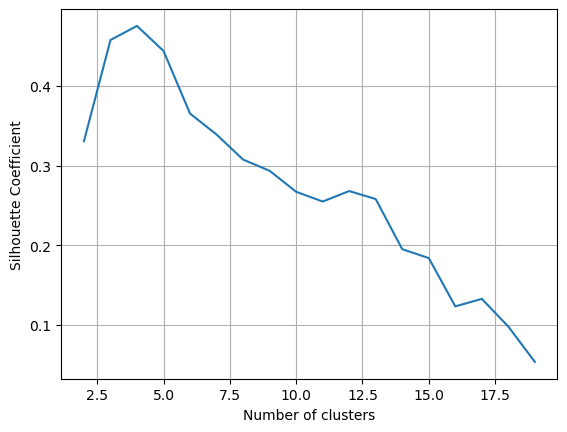

In [38]:
# Plot the results
plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
# inertia scorees: big drop off and low around 4 


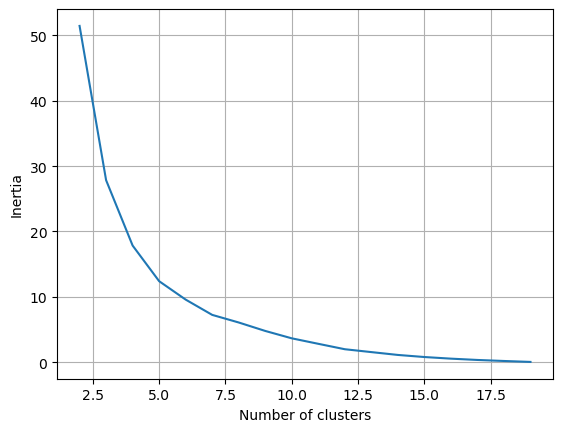

In [39]:
# Plot the results
plt.plot(k_range, inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [40]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1, n_init=10)
km.fit(X_scaled)
beer['cluster'] = km.labels_
beer.sort_values('cluster')
# look at clsuter 2, 
# in the futrue we could pull this out or limit clusters to 3 and have it folded into another cluster. 

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


In [41]:
# NOTE: The clustering is easy. The hard part is figuring out what features are the groups separated on.
# This is where domain knowledge is important.
# this is a good starting point when it comes to marketing. 
# what do they have in common within the group and what they have that is NOT in common between groups.
# Clustering is great in marketing segmentation and product segmentation. 
# in the real world we dont get the name of the beer, all we see are the attributes. 
# ASk: what do the clusters have in common?

# WHAT if you dont know anything about beer? USE THE ELBOW METHOD. 
# ELBOW: were the line bends is were you start.
# If you are using Kmeans how would you start with the numebr of clusters? I would start with the Elbow Method. 


In [42]:
# K-means with 7 clusters on scaled data
km7 = KMeans(n_clusters=7, random_state=1, n_init=10)
km7.fit(X_scaled)
beer['cluster'] = km7.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
14,Kirin,149,6,5.0,0.79,0
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
16,Hamms,139,19,4.4,0.43,1
10,Coors,140,18,4.6,0.44,1
15,Pabst_Extra_Light,68,15,2.3,0.38,2
18,Olympia_Goled_Light,72,6,2.9,0.46,2
2,Lowenbrau,157,15,0.9,0.48,3
